In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython.display import display

from scipy import stats
import matplotlib.pyplot as plt


plt.style.use('ggplot')


pd.set_option('display.max_columns', None)

In [3]:
# Data import
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
df = train.copy()
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [4]:
# selecting nmeric fields from the dataset
num = df.select_dtypes(include = [np.number])

# #All NaN Numerical Features
num.isnull().sum().sort_values(ascending = False)
num['LotFrontage'] .unique()
##Summary of the field
num['LotFrontage'].describe()
#Get the list of rows with nulls for LotFrontage
num[num['LotFrontage'].isnull()]

##Provides sum of Nan/nulls presen in all, the fields of the df
#num.isnull().sum()
# # Changing NA to '0' for LotFrontage

num['LotFrontage'] = num['LotFrontage'].fillna(0)

num.loc[num['LotFrontage'] == 0]


# # Changing NA to '0' for MasVnrArea
# num['MasVnrArea'] = num['MasVnrArea'].fillna(0)

# # All LotArea < 50000
# lot_area = num.loc[num['LotArea']< 50000] 


# iterating the columns 
# num_col_names=list(num.columns.values) 
# print(num_col_names)
## get the Column names and datatypes of the dataframe num
num_columnnames_Dtypes = pd.DataFrame({'column_names': num.columns, 'datatypes': num.dtypes})
print(num_columnnames_Dtypes)


                column_names datatypes
Id                        Id     int64
MSSubClass        MSSubClass     int64
LotFrontage      LotFrontage   float64
LotArea              LotArea     int64
OverallQual      OverallQual     int64
OverallCond      OverallCond     int64
YearBuilt          YearBuilt     int64
YearRemodAdd    YearRemodAdd     int64
MasVnrArea        MasVnrArea   float64
BsmtFinSF1        BsmtFinSF1     int64
BsmtFinSF2        BsmtFinSF2     int64
BsmtUnfSF          BsmtUnfSF     int64
TotalBsmtSF      TotalBsmtSF     int64
1stFlrSF            1stFlrSF     int64
2ndFlrSF            2ndFlrSF     int64
LowQualFinSF    LowQualFinSF     int64
GrLivArea          GrLivArea     int64
BsmtFullBath    BsmtFullBath     int64
BsmtHalfBath    BsmtHalfBath     int64
FullBath            FullBath     int64
HalfBath            HalfBath     int64
BedroomAbvGr    BedroomAbvGr     int64
KitchenAbvGr    KitchenAbvGr     int64
TotRmsAbvGrd    TotRmsAbvGrd     int64
Fireplaces        Firepla

C:\Users\19082\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


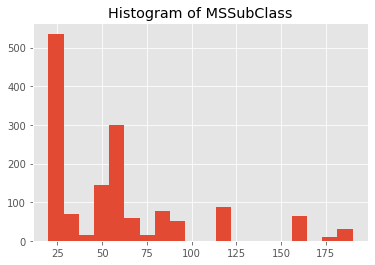

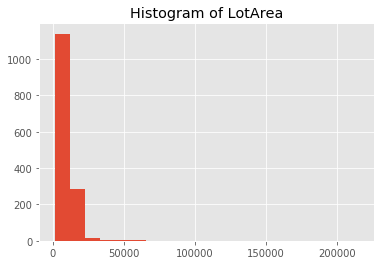

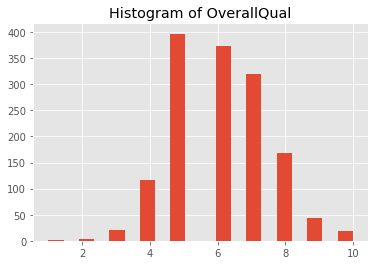

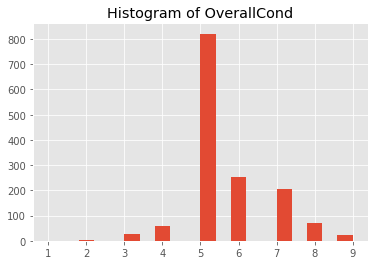

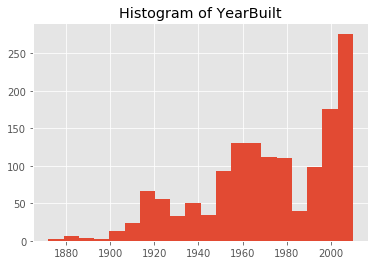

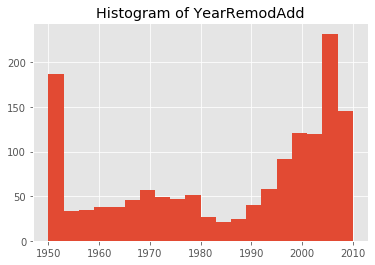

C:\Users\19082\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\19082\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


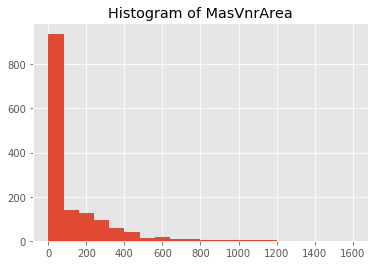

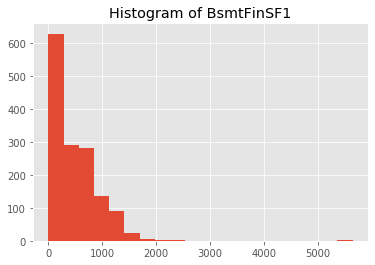

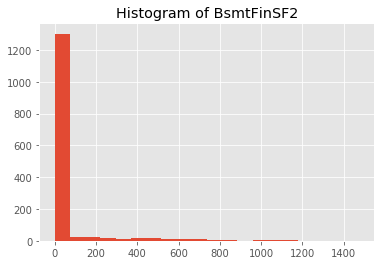

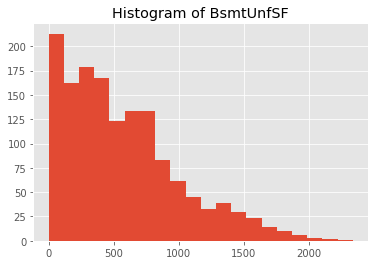

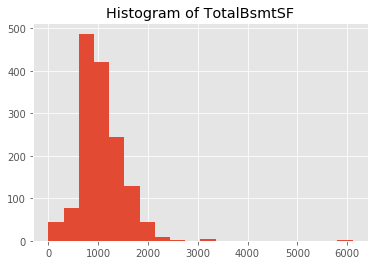

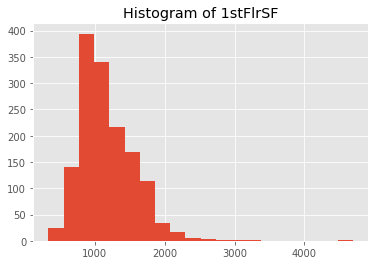

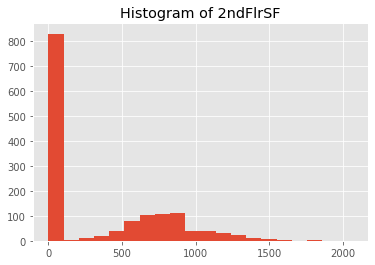

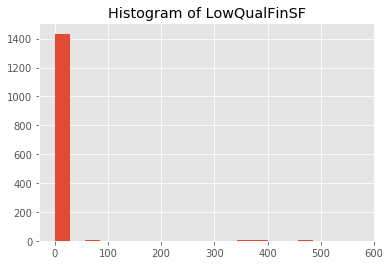

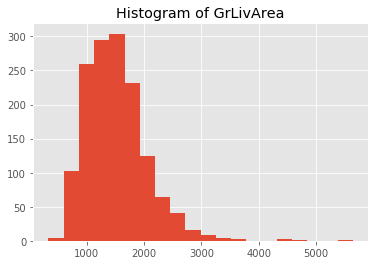

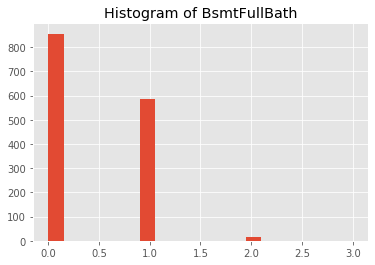

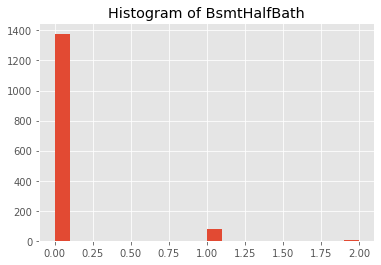

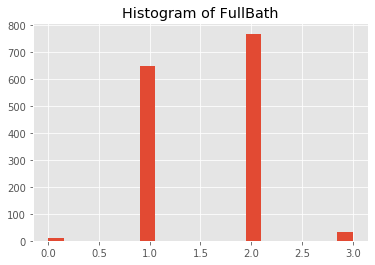

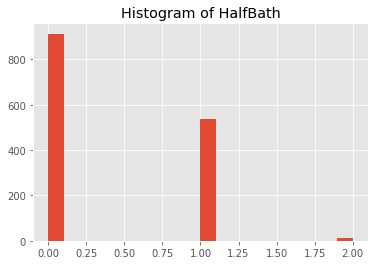

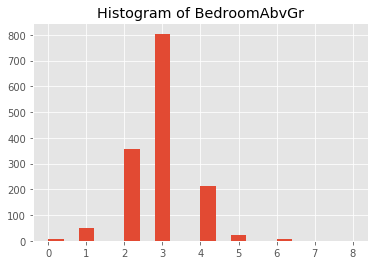

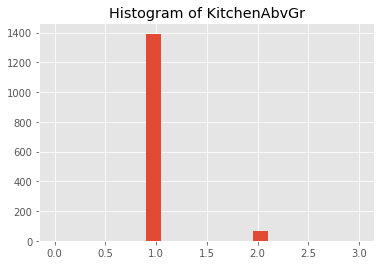

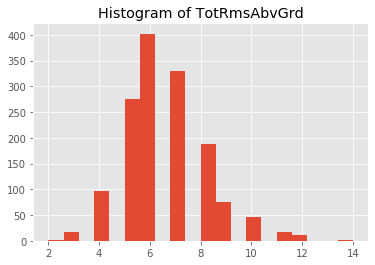

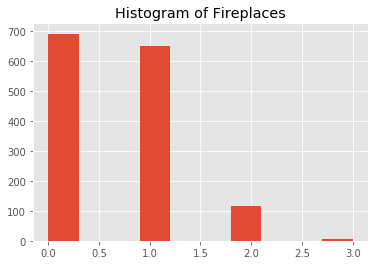

C:\Users\19082\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\19082\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


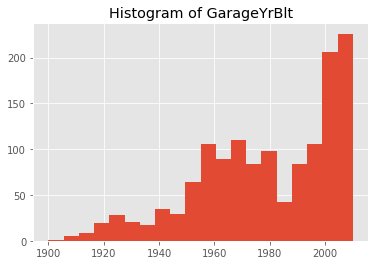

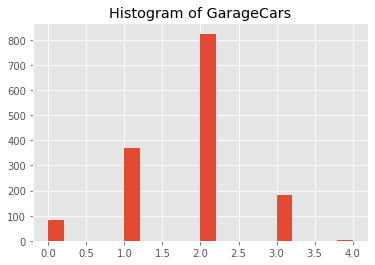

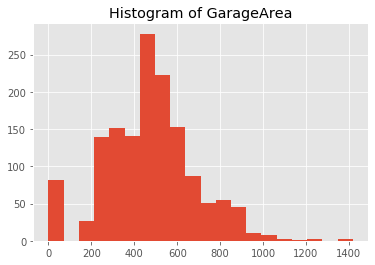

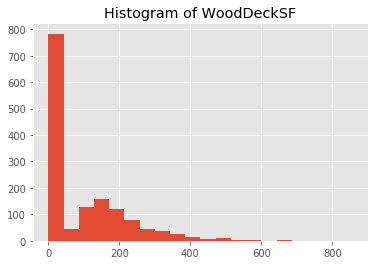

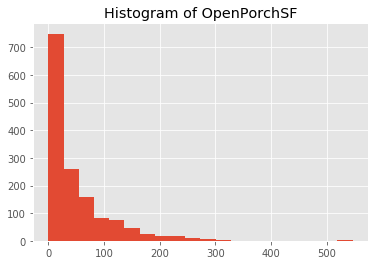

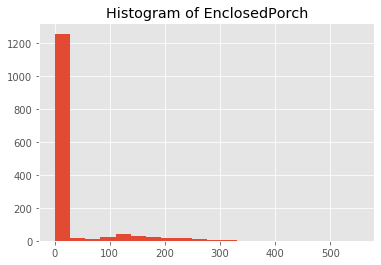

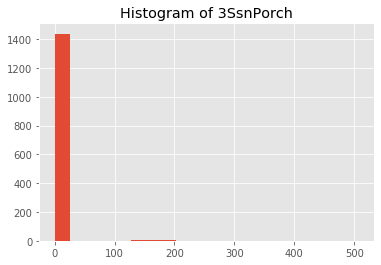

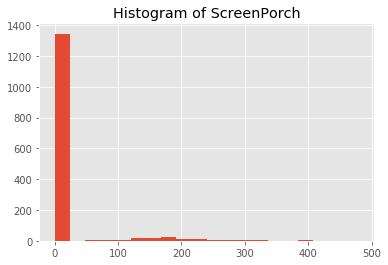

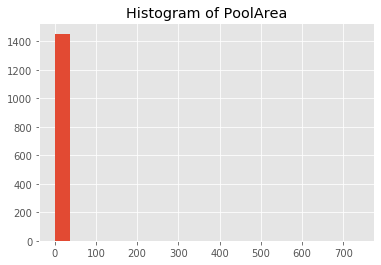

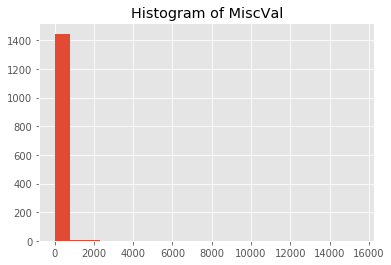

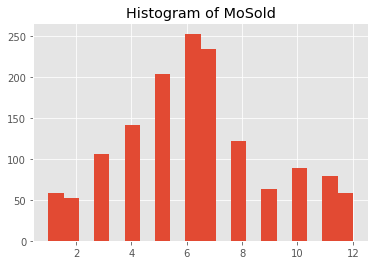

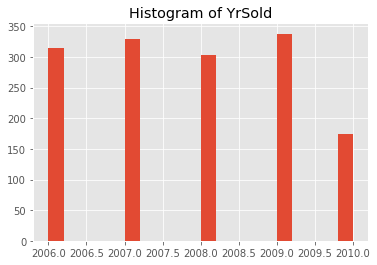

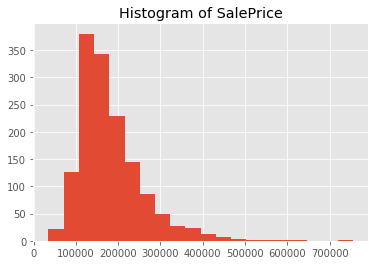

In [5]:
# #Plot histogram for every column of num dataframe

 #For column MSSubClass
plt.title('Histogram of MSSubClass')
plt.style.use('ggplot')
plt.hist(num['MSSubClass'], bins=20)
plt.show()
 

 
 #For column LotArea
plt.title('Histogram of LotArea')
plt.style.use('ggplot')
plt.hist(num['LotArea'], bins=20)
plt.show()
     
#For column OverallQual
plt.title('Histogram of OverallQual')
plt.style.use('ggplot')
plt.hist(num['OverallQual'], bins=20)
plt.show()


  #For column OverallCond
plt.title('Histogram of OverallCond')
plt.style.use('ggplot')
plt.hist(num['OverallCond'], bins=20)
plt.show()

 #For column YearBuilt
plt.title('Histogram of YearBuilt')
plt.style.use('ggplot')
plt.hist(num['YearBuilt'], bins=20)
plt.show()


 #For column YearRemodAdd
plt.title('Histogram of YearRemodAdd')
plt.style.use('ggplot')
plt.hist(num['YearRemodAdd'], bins=20)
plt.show()

 #For column MasVnrArea
plt.title('Histogram of MasVnrArea')
plt.style.use('ggplot')
plt.hist(num['MasVnrArea'], bins=20)
plt.show()

 #For column BsmtFinSF1
plt.title('Histogram of BsmtFinSF1')
plt.style.use('ggplot')
plt.hist(num['BsmtFinSF1'], bins=20)
plt.show()



 #For column BsmtFinSF2
plt.title('Histogram of BsmtFinSF2')
plt.style.use('ggplot')
plt.hist(num['BsmtFinSF2'], bins=20)
plt.show()

 #For column BsmtUnfSF
plt.title('Histogram of BsmtUnfSF')
plt.style.use('ggplot')
plt.hist(num['BsmtUnfSF'], bins=20)
plt.show()

 #For column TotalBsmtSF
plt.title('Histogram of TotalBsmtSF')
plt.style.use('ggplot')
plt.hist(num['TotalBsmtSF'], bins=20)
plt.show()

 
 #For column 1stFlrSF
plt.title('Histogram of 1stFlrSF')
plt.style.use('ggplot')
plt.hist(num['1stFlrSF'], bins=20)
plt.show()

 #For column 2ndFlrSF
plt.title('Histogram of 2ndFlrSF')
plt.style.use('ggplot')
plt.hist(num['2ndFlrSF'], bins=20)
plt.show()


 #For column LowQualFinSF
plt.title('Histogram of LowQualFinSF')
plt.style.use('ggplot')
plt.hist(num['LowQualFinSF'], bins=20)
plt.show()

 #For column GrLivArea
plt.title('Histogram of GrLivArea')
plt.style.use('ggplot')
plt.hist(num['GrLivArea'], bins=20)
plt.show()

#For column BsmtFullBath
plt.title('Histogram of BsmtFullBath')
plt.style.use('ggplot')
plt.hist(num['BsmtFullBath'], bins=20)
plt.show()

 #For column BsmtHalfBath
plt.title('Histogram of BsmtHalfBath')
plt.style.use('ggplot')
plt.hist(num['BsmtHalfBath'], bins=20)
plt.show()

 #For column FullBath
plt.title('Histogram of FullBath')
plt.style.use('ggplot')
plt.hist(num['FullBath'], bins=20)
plt.show()

 #For column HalfBath
plt.title('Histogram of HalfBath')
plt.style.use('ggplot')
plt.hist(num['HalfBath'], bins=20)
plt.show()

 #For column BedroomAbvGr
plt.title('Histogram of BedroomAbvGr')
plt.style.use('ggplot')
plt.hist(num['BedroomAbvGr'], bins=20)
plt.show()

 #For column KitchenAbvGr
plt.title('Histogram of KitchenAbvGr')
plt.style.use('ggplot')
plt.hist(num['KitchenAbvGr'], bins=20)
plt.show()

 #For column TotRmsAbvGrd
plt.title('Histogram of TotRmsAbvGrd')
plt.style.use('ggplot')
plt.hist(num['TotRmsAbvGrd'], bins=20)
plt.show()

 #For column Fireplaces
plt.title('Histogram of Fireplaces')
plt.style.use('ggplot')
plt.hist(num['Fireplaces'], bins=10)
plt.show()

 #For column GarageYrBlt
plt.title('Histogram of GarageYrBlt')
plt.style.use('ggplot')
plt.hist(num['GarageYrBlt'], bins=20)
plt.show()

 #For column GarageCars
plt.title('Histogram of GarageCars')
plt.style.use('ggplot')
plt.hist(num['GarageCars'], bins=20)
plt.show()

 #For column GarageArea
plt.title('Histogram of GarageArea')
plt.style.use('ggplot')
plt.hist(num['GarageArea'], bins=20)
plt.show()

 #For column WoodDeckSF
plt.title('Histogram of WoodDeckSF')
plt.style.use('ggplot')
plt.hist(num['WoodDeckSF'], bins=20)
plt.show()
 #For column OpenPorchSF
plt.title('Histogram of OpenPorchSF')
plt.style.use('ggplot')
plt.hist(num['OpenPorchSF'], bins=20)
plt.show()

 #For column EnclosedPorch
plt.title('Histogram of EnclosedPorch')
plt.style.use('ggplot')
plt.hist(num['EnclosedPorch'], bins=20)
plt.show()

 #For column 3SsnPorch
plt.title('Histogram of 3SsnPorch')
plt.style.use('ggplot')
plt.hist(num['3SsnPorch'], bins=20)
plt.show()

 #For column ScreenPorch
plt.title('Histogram of ScreenPorch')
plt.style.use('ggplot')
plt.hist(num['ScreenPorch'], bins=20)
plt.show()

 
 #For column PoolArea
plt.title('Histogram of PoolArea')
plt.style.use('ggplot')
plt.hist(num['PoolArea'], bins=20)
plt.show()

 #For column MiscVal
plt.title('Histogram of MiscVal')
plt.style.use('ggplot')
plt.hist(num['MiscVal'], bins=20)
plt.show()

 #For column MoSold
plt.title('Histogram of MoSold')
plt.style.use('ggplot')
plt.hist(num['MoSold'], bins=20)
plt.show()

 #For column YrSold
plt.title('Histogram of YrSold')
plt.style.use('ggplot')
plt.hist(num['YrSold'], bins=20)
plt.show()

 #For column SalePrice
plt.title('Histogram of SalePrice')
plt.style.use('ggplot')
plt.hist(num['SalePrice'], bins=20)
plt.show()
